# Proyecto satisfaccion de vida



Este código sigue la estructura clásica: carga → EDA → preprocessing → modelo → métricas.

# PARTE 1 — Construcción del dataset

## Construcción del dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [12]:
oecd = pd.read_csv("/content/OECD,DF_BLI,+all.csv")
gdp = pd.read_csv("/content/gdp-per-capita-worldbank.csv")

In [13]:
print(oecd.head())
print(oecd.info())

print(gdp.head())
print(gdp.info())

  STRUCTURE      STRUCTURE_ID  STRUCTURE_NAME ACTION LOCATION  Unnamed: 5  \
0  DATAFLOW  OECD:DF_BLI(1.0)             NaN      I      AUT         NaN   
1  DATAFLOW  OECD:DF_BLI(1.0)             NaN      I      BEL         NaN   
2  DATAFLOW  OECD:DF_BLI(1.0)             NaN      I      CAN         NaN   
3  DATAFLOW  OECD:DF_BLI(1.0)             NaN      I      CZE         NaN   
4  DATAFLOW  OECD:DF_BLI(1.0)             NaN      I      DNK         NaN   

  INDICATOR  Unnamed: 7 MEASURE  Unnamed: 9 INEQUALITY  Unnamed: 11  \
0   JE_LMIS         NaN       L         NaN        TOT          NaN   
1   JE_LMIS         NaN       L         NaN        TOT          NaN   
2   JE_LMIS         NaN       L         NaN        TOT          NaN   
3   JE_LMIS         NaN       L         NaN        TOT          NaN   
4   JE_LMIS         NaN       L         NaN        TOT          NaN   

   OBS_VALUE  Unnamed: 13 OBS_STATUS  Unnamed: 15 UNIT_MEASURE  Unnamed: 17  \
0        2.3          NaN      

## Filtrado y selección de variables relevantes
 OECD – Life satisfaction

La base OECD contiene múltiples indicadores. Debemos filtrar:

- Indicador: Life satisfaction
- Periodo: 2021–2025
- Medida promedio

In [20]:
print(oecd['INDICATOR'].unique())

['JE_LMIS' 'HO_BASE' 'PS_FSAFEN' 'HO_HISH' 'JE_EMPL' 'JE_LTUR' 'SC_SNTWS'
 'ES_EDUA' 'EQ_WATER' 'CG_VOTO' 'HS_SFRH' 'WL_EWLH' 'CG_SENG' 'ES_STCS'
 'SW_LIFS' 'HO_NUMR' 'IW_HADI' 'IW_HNFW' 'JE_PEARN' 'ES_EDUEX' 'EQ_AIRP'
 'HS_LEB' 'PS_REPH' 'WL_TNOW']


In [21]:
life = oecd[
    (oecd["INDICATOR"] == "SW_LIFS")
]

life = life[["LOCATION", "OBS_VALUE"]]
life = life.rename(columns={
    "LOCATION": "Country",
    "OBS_VALUE": "Life_satisfaction"
})

life.head()

,Country,Life_satisfaction
1519,AUS,7.1
1520,AUT,7.2
1521,BEL,6.8
1522,CAN,7.0
1523,CZE,6.9


GDP per capita – World Bank

El archivo del Banco Mundial suele tener años como columnas.

Primero inspeccionamos:

In [22]:
print(gdp.columns)

Index(['Entity', 'Code', 'Year', 'GDP per capita',
       'World region according to OWID'],
      dtype='object')


Seleccionamos 2021–2025:

In [24]:
gdp_selected = gdp[["Entity", "Year", "GDP per capita"]]

# Filter for years 2021-2025
gdp_selected = gdp_selected[gdp_selected["Year"].between(2021, 2025)]

gdp_melted = gdp_selected.rename(columns={
    "Entity": "Country",
    "GDP per capita": "GDP_per_capita"
})

gdp_melted.head()

,Country,Year,GDP_per_capita
21,Afghanistan,2021,2144.1665
22,Afghanistan,2022,1981.7102
23,Afghanistan,2023,1983.8126
55,Albania,2021,17329.5500
56,Albania,2022,18448.5180


## Integración del dataset

Realizamos un merge por Country y Year.

Y, después de recrear el DataFrame life con los datos de satisfacción vital, aplicar el mapeo de los nombres de los países y fusionarlo con el DataFrame gdp_melted, tenemos nuestro dataset

In [43]:
life = oecd[
    (oecd["INDICATOR"] == "SW_LIFS")
]

life = life[["LOCATION", "OBS_VALUE"]]
life = life.rename(columns={
    "LOCATION": "Country",
    "OBS_VALUE": "Life_satisfaction"
})

country_mapping = {
    'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'CAN': 'Canada',
    'CZE': 'Czechia', 'DNK': 'Denmark', 'FIN': 'Finland', 'FRA': 'France',
    'DEU': 'Germany', 'GRC': 'Greece', 'HUN': 'Hungary', 'ISL': 'Iceland',
    'IRL': 'Ireland', 'ITA': 'Italy', 'JPN': 'Japan', 'KOR': 'South Korea',
    'LUX': 'Luxembourg', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NZL': 'New Zealand',
    'NOR': 'Norway', 'POL': 'Poland', 'PRT': 'Portugal', 'SVK': 'Slovakia',
    'ESP': 'Spain', 'SWE': 'Sweden', 'CHE': 'Switzerland', 'TUR': 'Turkey',
    'GBR': 'United Kingdom', 'USA': 'United States', 'BRA': 'Brazil', 'CHL': 'Chile',
    'EST': 'Estonia', 'ISR': 'Israel', 'LVA': 'Latvia', 'RUS': 'Russia',
    'SVN': 'Slovenia', 'ZAF': 'South Africa', 'COL': 'Colombia', 'LTU': 'Lithuania',
    'CRI': 'Costa Rica',
}

life['Country'] = life['Country'].map(country_mapping)
life.dropna(subset=['Country'], inplace=True)

dataset = pd.merge(
    life,
    gdp_melted,
    on=["Country"],
    how="inner"
)

dataset.head()

,Country,Life_satisfaction,Year,GDP_per_capita
0,Australia,7.1,2021,58327.414
1,Australia,7.1,2022,60029.133
2,Australia,7.1,2023,60684.960
3,Australia,7.1,2024,60303.980
4,Austria,7.2,2021,62968.940


## Limpieza final

In [44]:
dataset = dataset.dropna()
dataset = dataset.sort_values(["Country", "Year"]).reset_index(drop=True)

dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            812 non-null    object 
 1   Life_satisfaction  812 non-null    float64
 2   Year               812 non-null    int64  
 3   GDP_per_capita     812 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 25.5+ KB


,Life_satisfaction,Year,GDP_per_capita
count,812.000000,812.000000,812.000000
mean,6.689163,2022.500000,52436.397797
std,0.730711,1.118723,23693.100541
min,4.300000,2021.000000,13597.654000
25%,6.200000,2021.750000,38664.906000
50%,6.800000,2022.500000,48248.720000
75%,7.300000,2023.250000,62731.700000
max,8.500000,2024.000000,136772.440000


## Y guardamos del dataset construido

In [45]:
dataset.to_csv("dataset_satisfaccion_vida_2021_2025.csv", index=False)

# PARTE 2 — Análisis

Ahora seguimos la estructura:

1. Visualización inicial
2. Exploración de relaciones
3. Preparación para ML
4. Modelo
5. Evaluación

## Visualización

Scatter GDP vs Life Satisfaction

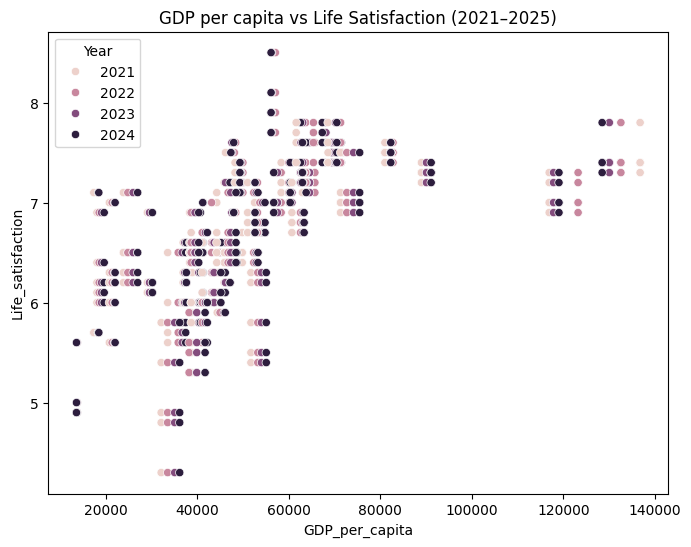

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset,
                x="GDP_per_capita",
                y="Life_satisfaction",
                hue="Year")

plt.title("GDP per capita vs Life Satisfaction (2021–2025)")
plt.show()

## Correlación

In [47]:
corr = dataset[["GDP_per_capita", "Life_satisfaction"]].corr()
print(corr)

                   GDP_per_capita  Life_satisfaction
GDP_per_capita           1.000000           0.610605
Life_satisfaction        0.610605           1.000000


# PARTE 3 — Modelo de regresión

Definición de variables

In [48]:
X = dataset[["GDP_per_capita"]]
y = dataset["Life_satisfaction"]

División entrenamiento/prueba

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Entrenamiento

In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluación

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)

MSE: 0.33101973960349634
R2: 0.40325258097942096


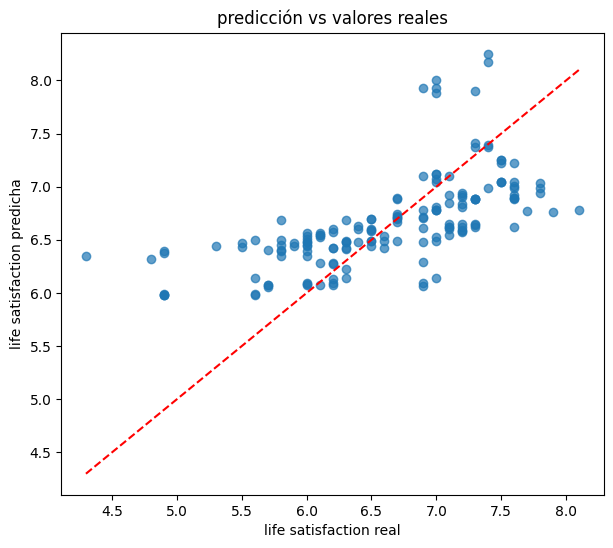

In [53]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.xlabel("life satisfaction real")
plt.ylabel("life satisfaction predicha")
plt.title("predicción vs valores reales")
plt.show()

El modelo lineal es limitado.

## Análisis de residuos

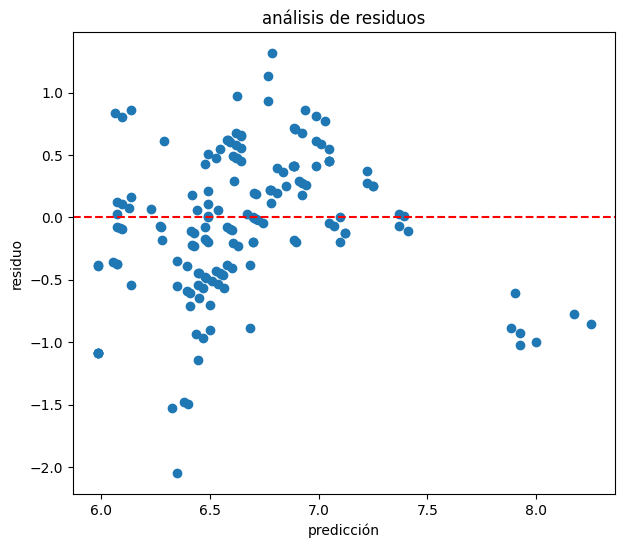

In [55]:
residuals = y_test - y_pred

plt.figure(figsize=(7,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("predicción")
plt.ylabel("residuo")
plt.title("análisis de residuos")
plt.show()

Como si hay estructura, el modelo lineal es insuficiente, probaremos con otro método.

## Primera mejora: transformación logarítmica

Antes de probar con otro método, primero intentemos algo razonable (transformar GDP).

In [62]:
dataset["log_GDP"] = np.log(dataset["GDP_per_capita"])

In [63]:
X_log = dataset[["log_GDP"]]
y = dataset["Life_satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(
    X_log, y, test_size=0.2, random_state=42
)

model_log = LinearRegression()
model_log.fit(X_train, y_train)

y_pred_log = model_log.predict(X_test)

mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)

print("MSE log:", mse_log)
print("R2 log:", r2_log)

MSE log: 0.28771502273068733
R2 log: 0.4813203664722736


Sin embargo, no funciono, probemos algo mejor.

## Modelo no lineal

Ahora sí vamos a un modelo más flexible (Random Forest).

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MSE RF:", mse_rf)
print("R2 RF:", r2_rf)

MSE RF: 0.10305461140661494
R2 RF: 0.8142178063195582


Comparación de modelos:

In [65]:
results = pd.DataFrame({
    "Model": ["Linear", "Log-Linear", "Random Forest"],
    "MSE": [mse, mse_log, mse_rf],
    "R2": [r2, r2_log, r2_rf]
})

print(results)

           Model       MSE        R2
0         Linear  0.331020  0.403253
1     Log-Linear  0.287715  0.481320
2  Random Forest  0.103055  0.814218


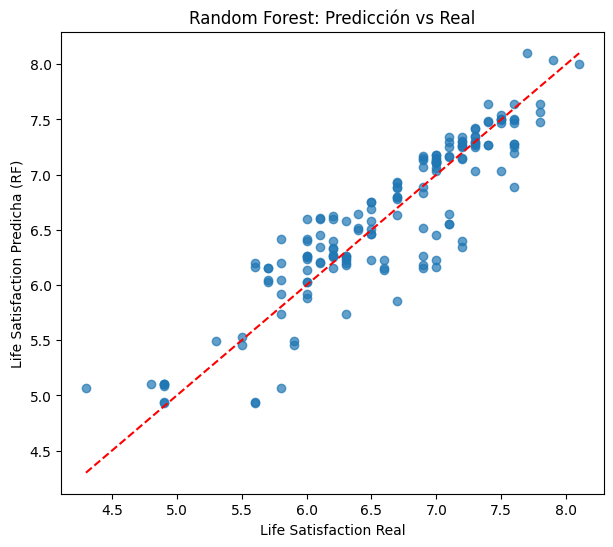

In [66]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.xlabel("life satisfaction real")
plt.ylabel("life satisfaction predicha (RF)")
plt.title("Random Forest: predicción vs real")
plt.show()

## Conclusión:

Random Forest mejora R² significativamente:

La interpretación es que el efecto del ingreso sobre bienestar no es lineal.

- Puede haber saturación en países ricos.

- Pueden existir umbrales estructurales.

- El PIB explica parcialmente el bienestar, pero factores institucionales, sociales y culturales explican el resto de la varianza.